In [1]:
from os import path
import os
import h5py as h5
import numpy as np
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
def NumPart_files_gen(d):
    NumPart_files = np.zeros(6)
    for f in sorted(os.listdir(d)):
        with h5.File(path.join(d, f),'r') as hf:
            NumPart_ThisFile = hf['Header'].attrs['NumPart_ThisFile']
            NumPart_files += (NumPart_ThisFile!=0)
    return NumPart_files

In [3]:
def NumPart_files_snaps_gen(simdir):
    NumPart_files_snaps = []
    for d in tqdm(sorted(glob(f'{simdir}/snapdir_*'))):
        NumPart_files_snaps.append(NumPart_files_gen(d))
    return np.array(NumPart_files_snaps)

In [4]:
NumPart_files_snaps_m13sims = {k:NumPart_files_snaps_gen(f'/projects/b1026/anglesd/FIRE/{k}_HR_sn1dy300ro100ss') for k in ['h206', 'h29', 'h113', 'h2']}

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 278/278 [01:00<00:00,  4.63it/s]


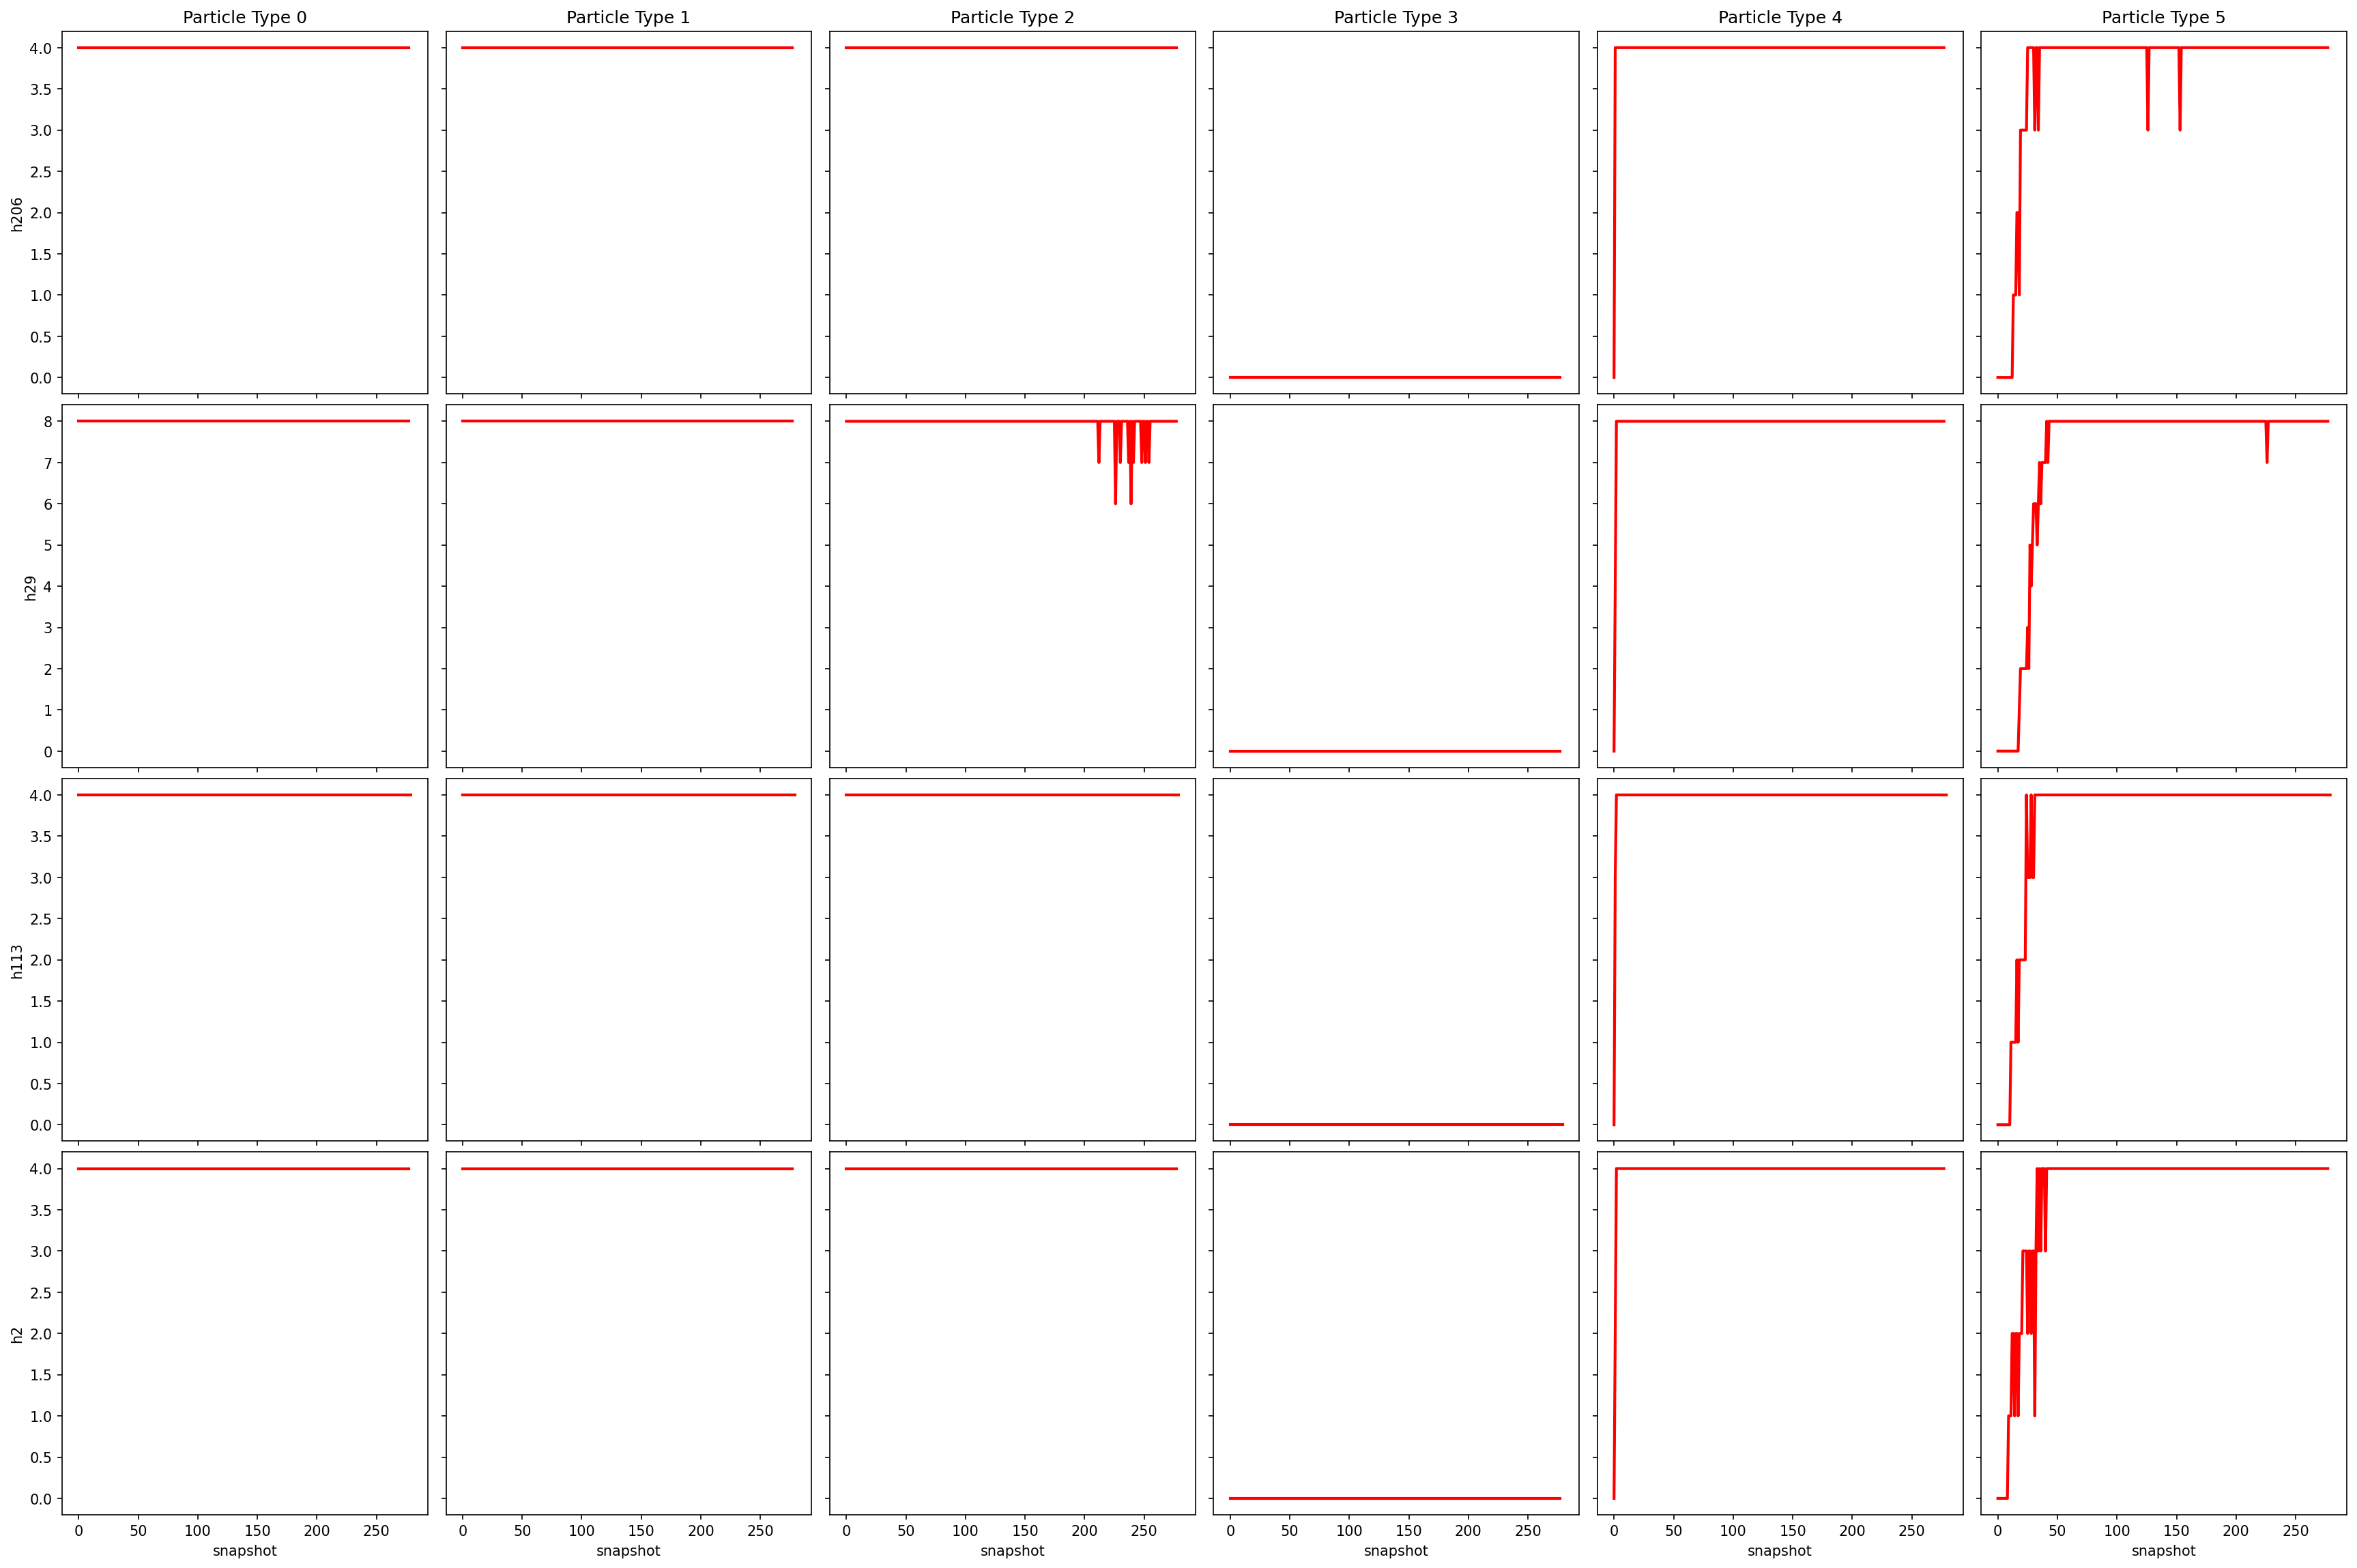

In [49]:
fig, axes = plt.subplots(4, 6, sharex=True, sharey='row', gridspec_kw={'wspace': .05, 'hspace':.03}, figsize=[4.8*6,4.8*4], dpi=150, facecolor='w')
for i,k in enumerate(NumPart_files_snaps_m13sims.keys()):
    axes[i,0].set_ylabel(k)
    for ptype in range(6):
        axes[i,ptype].plot(range(len(NumPart_files_snaps_m13sims[k][:,ptype])), NumPart_files_snaps_m13sims[k][:,ptype],'r-',lw=2,label=ptype)
        axes[0,ptype].set_title(f'Particle Type {ptype}')
        axes[3,ptype].set_xlabel('snapshot')